In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.drop(columns=['date', 'lights'],inplace=True)

In [5]:
#normalization
from sklearn.preprocessing import MinMaxScaler


In [6]:
scaler = MinMaxScaler()

In [7]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
normalised_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [8]:
features_af_x = normalised_df.drop(columns=['Appliances'])
heating_target_y = normalised_df['Appliances']

In [9]:
features_af_x.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [10]:
heating_target_y.head()

0    0.046729
1    0.046729
2    0.037383
3    0.037383
4    0.046729
Name: Appliances, dtype: float64

In [11]:
#Training Dataset
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(features_af_x, heating_target_y, test_size=0.3, random_state=43)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

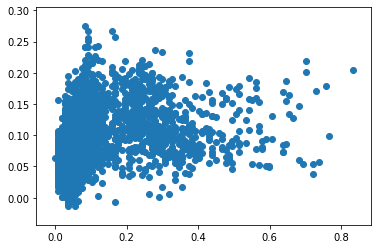

In [15]:
plt.scatter(y_test,predicted_values)

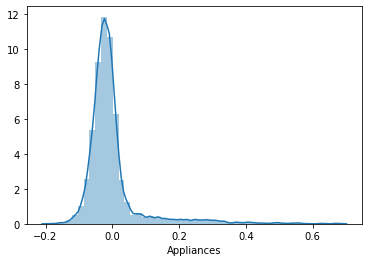

In [16]:
sns.distplot((y_test - predicted_values))

In [17]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 	#prints 0.063

0.049

In [18]:
#R-squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)	#prints 0.893

0.133

In [19]:
#Residual Sum of Square
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)	    #prints 1.823

43.972

In [20]:
#Root Mean Square Error
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 	#prints 0.089

0.086

In [21]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)
alex = ridge_reg.fit(x_train, y_train)


In [22]:
alex.coef_

array([-1.39561087e-02,  5.20829486e-01, -2.14079850e-01, -4.36879485e-01,
        2.90064550e-01,  1.00480876e-01,  2.58767713e-02,  3.69174406e-02,
       -4.16399359e-03,  1.25469563e-02,  2.08824810e-01,  2.75402497e-02,
        1.93739528e-02, -4.61701091e-02,  9.88567014e-02, -1.64597957e-01,
       -2.08039668e-01, -3.76079371e-02, -2.80763799e-01,  6.32961634e-03,
       -6.25009080e-02,  3.13215300e-02,  9.80544632e-03,  1.05202694e-01,
       -3.60993249e-04, -3.60993249e-04])

In [23]:
 #Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
alez=lasso_reg.fit(x_train, y_train)
alez.coef_

array([ 0.        ,  0.02511993,  0.00449969, -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00627449, -0.        , -0.        ,  0.        , -0.        ,
       -0.04973014,  0.00492688,  0.        ,  0.        , -0.        ,
       -0.        ])

In [24]:
#comparing the effects of regularisation
def get_weights_df(linear_model, x_train, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(linear_model.coef_, x_train.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [25]:
weights = pd.Series(linear_model.coef_, x_train.columns).sort_values()
weights

RH_2          -0.495100
T_out         -0.359438
T2            -0.258905
T9            -0.209510
RH_8          -0.165504
RH_out        -0.093065
RH_7          -0.044719
RH_9          -0.035701
rv2           -0.000347
rv1           -0.000347
T5             0.001412
T1             0.005352
Press_mm_hg    0.006584
Visibility     0.010073
RH_5           0.012489
T7             0.020368
T4             0.028010
Windspeed      0.029873
RH_6           0.031018
RH_4           0.039904
T8             0.099759
RH_3           0.102025
Tdewpoint      0.151037
T6             0.234088
T3             0.293120
RH_1           0.562440
dtype: float64

In [26]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [27]:
linear_model_weights

,Features,Linear_Model_Weight
0,RH_2,-0.495100
1,T_out,-0.359438
2,T2,-0.258905
3,T9,-0.209510
4,RH_8,-0.165504
5,RH_out,-0.093065
6,RH_7,-0.044719
7,RH_9,-0.035701
8,rv2,-0.000347
9,rv1,-0.000347


In [28]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [29]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.495100,-0.436879,-0.000000
1,T_out,-0.359438,-0.280764,0.000000
2,T2,-0.258905,-0.214080,0.004500
3,T9,-0.209510,-0.208040,-0.000000
4,RH_8,-0.165504,-0.164598,-0.006274
5,RH_out,-0.093065,-0.062501,-0.049730
6,RH_7,-0.044719,-0.046170,-0.000000
7,RH_9,-0.035701,-0.037608,-0.000000
8,rv2,-0.000347,-0.000361,-0.000000
9,rv1,-0.000347,-0.000361,-0.000000


In [30]:
tf = normalised_df[['T2','T6']]

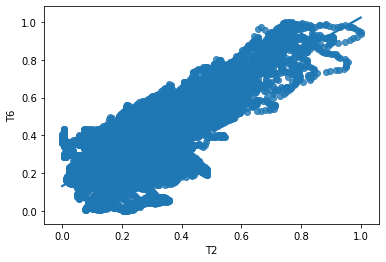

In [31]:
sns.regplot(data = tf, x = 'T2', y = 'T6')

In [32]:
#R-squared
from sklearn.metrics import r2_score
r2_score = r2_score(normalised_df['T2'], normalised_df['T6'])
round(r2_score, 2)	#prints 0.893

0.16

In [33]:
#Root Mean Square Error
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(normalised_df['T2'], normalised_df['T6']))
round(rmse, 2) 

0.15

In [ ]:
import numpy as np
rss = np.sum(np.square(normalised_df['T2'], normalised_df['T6']))
round(rss, 2)

In [ ]:
mae = mean_absolute_error(normalised_df['T2'], normalised_df['T6'])
round(mae, 2)